# Movie Recommender System

Inserting libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect with Google Drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/RecSys/')

Mounted at /content/drive


In [3]:
!pwd

/content/drive/MyDrive/RecSys


In [3]:
# Load the datase
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
# Load the movies dataset with appropriate column names
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None,
                     names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                            'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                            'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

In [4]:
# Merge the datasets
data = pd.merge(ratings, movies, left_on='item_id', right_on='movie_id')
data.head()

,user_id,item_id,rating,timestamp,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0


Here, I check whether the movie_id and item_id are identical.

In [5]:
import pandas as pd

# Assuming you have a DataFrame called 'data' with columns 'item_id' and 'movie_id'
# Check if values in 'item_id' and 'movie_id' columns are the same within each row
data['same_ids'] = data['item_id'] == data['movie_id']

# Check if all rows have the same values
all_same_values = data['same_ids'].all()

if all_same_values:
    print("All values in the 'item_id' and 'movie_id' columns are the same within each row.")
else:
    print("Not all values in the 'item_id' and 'movie_id' columns are the same within each row.")

data.drop(columns=['same_ids'], inplace=True)

All values in the 'item_id' and 'movie_id' columns are the same within each row.


Since, we've shown that they are identical we want to drop item_id which is the second column and place the movie_id column now as second place.

In [6]:
# Assuming you have a DataFrame called 'data' with columns 'item_id' and 'movie_id'
# Drop the 'item_id' column
data.drop(columns=['item_id'], inplace=True)

# Reorder columns to place 'movie_id' at the third position
columns_order = [data.columns[0], 'movie_id'] + [col for col in data.columns if col not in ['movie_id', data.columns[0]]]
data = data[columns_order]

# Display the updated DataFrame
print(data.head())

   user_id  movie_id  rating  timestamp         title release_date  \
0      196       242       3  881250949  Kolya (1996)  24-Jan-1997   
1       63       242       3  875747190  Kolya (1996)  24-Jan-1997   
2      226       242       5  883888671  Kolya (1996)  24-Jan-1997   
3      154       242       3  879138235  Kolya (1996)  24-Jan-1997   
4      306       242       5  876503793  Kolya (1996)  24-Jan-1997   

   video_release_date                                         IMDb_URL  \
0                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
2                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
3                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
4                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   

   unknown  Action  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0        0       0  ...        0          0       0        0 

Now, we convert the data into continous integer indices. First we check, how the data is coded and then we change it.

In [7]:
# Check unique user IDs and movie IDs
unique_user_ids = data['user_id'].unique()
unique_movie_ids = data['movie_id'].unique()

# Check the minimum and maximum values
print(f"User ID range: {unique_user_ids.min()} to {unique_user_ids.max()}")
print(f"Movie ID range: {unique_movie_ids.min()} to {unique_movie_ids.max()}")

# Check the number of unique IDs
num_unique_users = unique_user_ids.shape[0]
num_unique_movies = unique_movie_ids.shape[0]

print(f"Number of unique user IDs: {num_unique_users}")
print(f"Number of unique movie IDs: {num_unique_movies}")

# Verify user IDs are continuous
expected_user_ids = set(range(num_unique_users))
actual_user_ids = set(unique_user_ids)

if expected_user_ids == actual_user_ids:
    print("User IDs are continuous.")
else:
    print("User IDs are not continuous.")

# Verify movie IDs are continuous
expected_movie_ids = set(range(num_unique_movies))
actual_movie_ids = set(unique_movie_ids)

if expected_movie_ids == actual_movie_ids:
    print("Movie IDs are continuous.")
else:
    print("Movie IDs are not continuous.")

User ID range: 1 to 943
Movie ID range: 1 to 1682
Number of unique user IDs: 943
Number of unique movie IDs: 1682
User IDs are not continuous.
Movie IDs are not continuous.


As, we can see even though the data is continous from 1 to n, we need to subtract -1 fore each id.

### What is the lowest and highest rating on a movie?

In [8]:
mean_ratings = data.groupby('movie_id')[['rating']].mean()
mean_ratings = mean_ratings.rename(columns={'rating': 'mean_rating'})
lowest_rated = mean_ratings['mean_rating'].idxmin()
print(lowest_rated)
movies[movies['movie_id']==lowest_rated]

# This gives us all ratings of the lowest rated movie
# data[data['movie_id'] == lowest_rated]

314


,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
313,314,3 Ninjas: High Noon At Mega Mountain (1998),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Highest Rating

In [9]:
highest_rated = mean_ratings['mean_rating'].idxmax()
movies[movies['movie_id'] == highest_rated]

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's see how many ratings the movie Great Day in Harlem has

In [10]:
# This counts the number of ratings for each movie.
rating_counts = data.groupby('movie_id').size().reset_index(name='rating_count')
print(rating_counts)
# This retrieves the count of ratings for the highest-rated movie.
highest_rated_movie_count = rating_counts[rating_counts['movie_id'] == highest_rated]['rating_count'].iloc[0]
print(highest_rated_movie_count)

      movie_id  rating_count
0            1           452
1            2           131
2            3            90
3            4           209
4            5            86
...        ...           ...
1677      1678             1
1678      1679             1
1679      1680             1
1680      1681             1
1681      1682             1

[1682 rows x 2 columns]
1


### What is the distribution of the movie rating?

<ipython-input-11-1574b7711e73>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


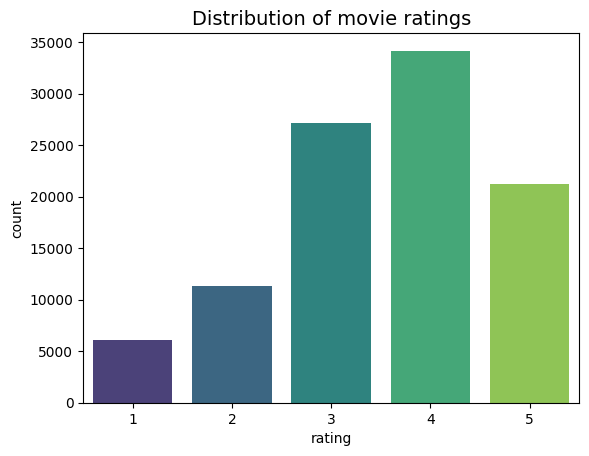

In [11]:
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [12]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

mean_ratings = ratings.groupby('user_id')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.53.
Mean rating per user: 3.59.


### Which movies are most frequently rated?


In [13]:
data['title'].value_counts()[0:10]

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64

Now, we explore the data using plotting mechanisms.

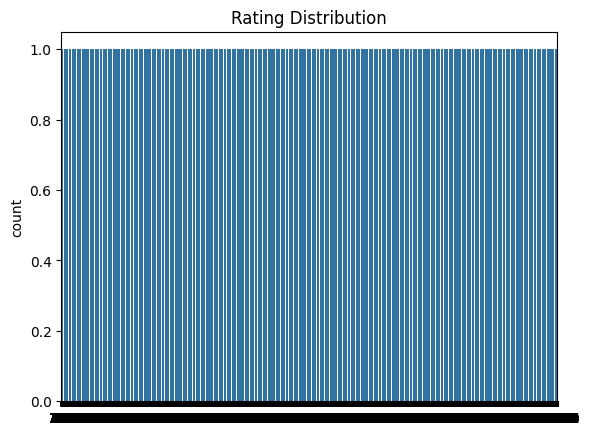

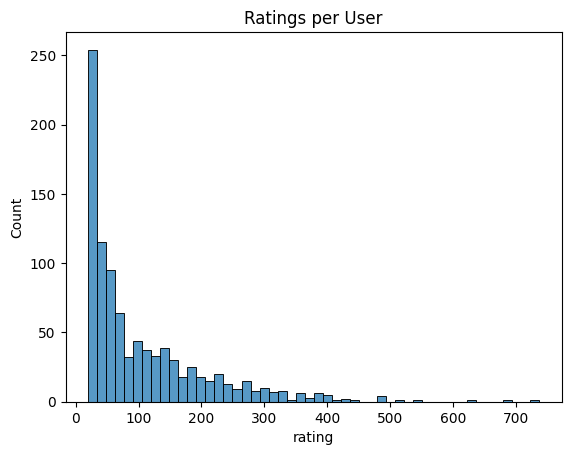

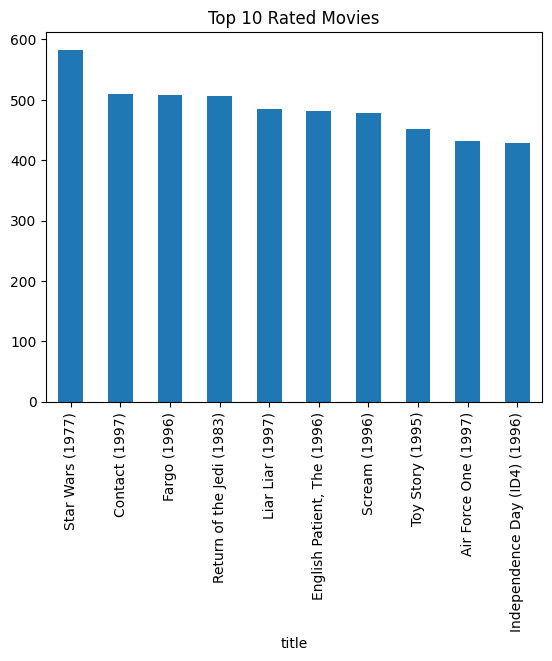

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
sns.countplot(data['rating'])
plt.title('Rating Distribution')
plt.show()

# Number of ratings per user
ratings_per_user = data.groupby('user_id')['rating'].count()
sns.histplot(ratings_per_user, bins=50)
plt.title('Ratings per User')
plt.show()

# Number of ratings per movie
ratings_per_movie = data.groupby('title')['rating'].count().sort_values(ascending=False)
ratings_per_movie.head(10).plot(kind='bar')
plt.title('Top 10 Rated Movies')
plt.show()

## Bayesian Average

The Bayesian Average is defined as: r_i = (C*m + sum(reviews)) /(C + N)

where C represents our confidence, m represents our prior, and N is the total number of reviews for movie i. In this case, our prior m will be the average mean rating across all movies. By defintion, C represents "the typical data set size". Let's make C be the average number of ratings for a given movie.

In [15]:
movie_stats = ratings.groupby('item_id')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
item_id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [16]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 59.45
Average rating for a given movie: 3.08


In [17]:
high_movie = pd.Series([5])
bayesian_avg(high_movie)

3.108

Here, we apply Bayesian Average to all movies

In [18]:
bayesian_avg_ratings = ratings.groupby('item_id')['rating'].agg(bayesian_avg).reset_index()
# Prints a two column dataframe
#print(bayesian_avg_ratings)
bayesian_avg_ratings.columns = ['item_id', 'bayesian_avg']
# print(bayesian_avg_ratings)
movie_stats_merge = movie_stats.merge(bayesian_avg_ratings, on='item_id')
print(movie_stats_merge)

      item_id  count      mean  bayesian_avg
0           1    452  3.878319         3.785
1           2    131  3.206107         3.166
2           3     90  3.033333         3.050
3           4    209  3.550239         3.445
4           5     86  3.302326         3.210
...       ...    ...       ...           ...
1677     1678      1  1.000000         3.042
1678     1679      1  3.000000         3.075
1679     1680      1  2.000000         3.058
1680     1681      1  3.000000         3.075
1681     1682      1  3.000000         3.075

[1682 rows x 4 columns]


In [19]:
movies_stats = movies[['movie_id', 'title']]
movies_stats = movies_stats.rename(columns={'movie_id': 'item_id'})
movie_stats_merged = movie_stats_merge.merge(movies_stats)
movie_stats_merged.sort_values('bayesian_avg', ascending=False).head()

,item_id,count,mean,bayesian_avg,title
49,50,583,4.358491,4.240,Star Wars (1977)
317,318,298,4.466443,4.235,Schindler's List (1993)
63,64,283,4.445230,4.208,"Shawshank Redemption, The (1994)"
482,483,243,4.456790,4.185,Casablanca (1942)
11,12,267,4.385768,4.147,"Usual Suspects, The (1995)"


In [20]:
movie_stats_merged.sort_values('bayesian_avg', ascending=True).head()

,item_id,count,mean,bayesian_avg,title
687,688,44,1.840909,2.551,Leave It to Beaver (1997)
686,687,69,2.188406,2.599,McHale's Navy (1997)
121,122,106,2.339623,2.604,"Cable Guy, The (1996)"
889,890,43,1.953488,2.605,Mortal Kombat: Annihilation (1997)
987,988,86,2.313953,2.625,"Beautician and the Beast, The (1997)"


Now, I'll explore the Movie Genres

In [21]:
from collections import Counter

# Assuming you have loaded the movies DataFrame with individual genre columns
# Combine individual genre columns into a single column
genres_df = movies.iloc[:, 6:]  # Assuming genre columns start from the 4th column
counts = genres_df.sum()

# Is pandas series object --> Converting to Counter Object with collections library
# print(type(counts))
counts_dict = counts.to_dict()
# Create a Counter object from the dictionary
counts_counter = Counter(counts_dict)

print(f"There are {len(counts_counter)} genres.")
print(counts_counter)

print("The 5 most common genres: \n", counts_counter.most_common(5))

There are 18 genres.
Counter({'Drama': 725, 'Comedy': 505, 'Action': 251, 'Thriller': 251, 'Romance': 247, 'Adventure': 135, 'Children': 122, 'Crime': 109, 'Sci-Fi': 101, 'Horror': 92, 'War': 71, 'Mystery': 61, 'Musical': 56, 'Documentary': 50, 'Animation': 42, 'Western': 27, 'Film-Noir': 24, 'Fantasy': 22})
The 5 most common genres: 
 [('Drama', 725), ('Comedy', 505), ('Action', 251), ('Thriller', 251), ('Romance', 247)]


Let's also visualize the genres popularity with a barplot.

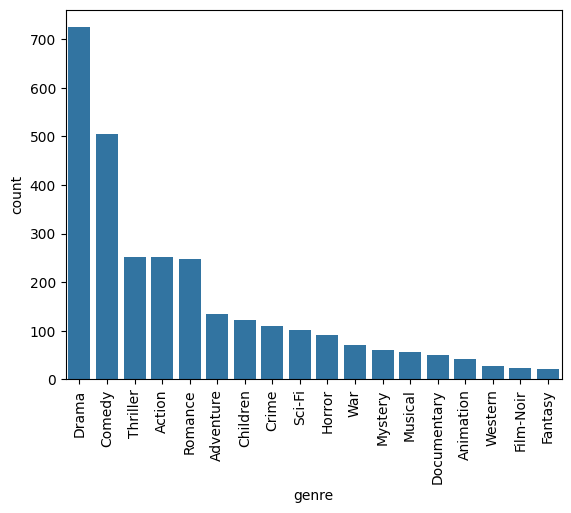

In [22]:
genre_frequency_df = pd.DataFrame([counts_counter]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

# Data Pre-processing
We are going to use a technique called colaborative filtering to generate recommendations for users. This technique is based on the premise that similar people like similar things.

The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent movies. The beauty of collaborative filtering is that it doesn't require any information about the users or the movies user to generate recommendations.

In [25]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['user_id'].nunique()
    N = df['movie_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movie_id"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movie_id"])))

    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [movie_mapper[i] for i in df['movie_id']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

In [26]:
df = data.iloc[:, :3]
df = df.rename(columns={df.columns[1]: 'movie_id'})

In [27]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(df)

## Evaluating sparsity

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix (nnz) is equivalent to the number of ratings in our dataset.


In [28]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 6.3%


The cold start problem is when there are new users and movies in our matrix that do not have any ratings. In our Movielens dataset, all users and movies have at least one rating but in general, it's useful to check which users and movies have few interactions.

In [29]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

943

In [30]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 737 movies.
Least active user rated 20 movies.


In [31]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

1682

In [32]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 583 ratings.
Least rated movie has 1 ratings.


<ipython-input-33-44089890dcd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
<ipython-input-33-44089890dcd7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_movie, shade=True)


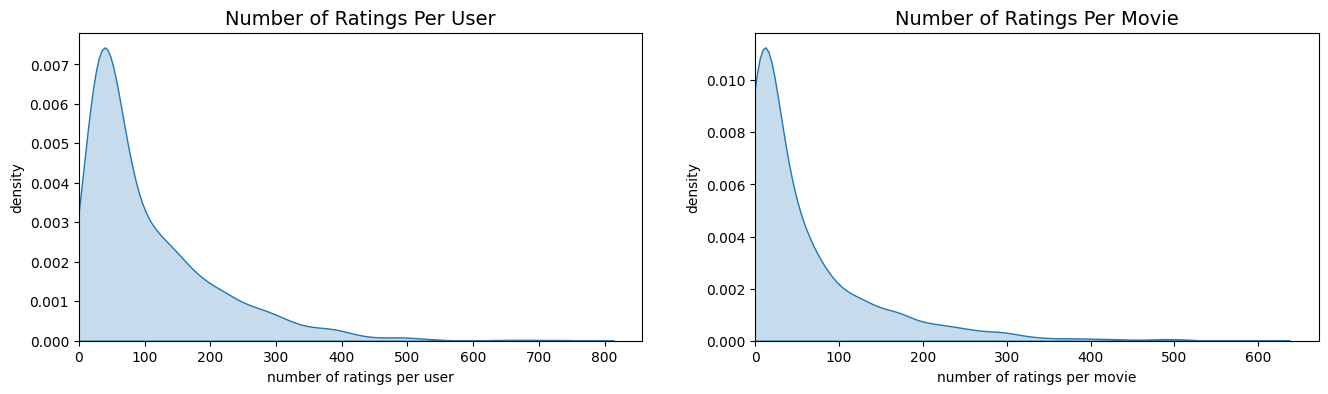

In [33]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

# Step 5: Item-item Recommendations with k-nearest Neighbors

We are going to find the k movies that have the most similar user engagement vectors for movie i.

In [54]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

Let's see how it works in action. We will first create another mapper that maps movieId to title so that our results are interpretable.

In [55]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[50, 181, 121, 117, 405, 151, 222, 100, 237]

Let's convert the IDs to movie titles.

In [56]:
movie_titles = dict(zip(movies['movie_id'], movies['title']))

movie_id = 2

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched GoldenEye (1995):
Under Siege (1992)
Top Gun (1986)
True Lies (1994)
Batman (1989)
Stargate (1994)
Cliffhanger (1993)
Die Hard 2 (1990)
Batman Returns (1992)
Die Hard: With a Vengeance (1995)


## Let's take it a step further

Instead of inputting just one movie, we can now input 5 movies to get recommendations. This offers a more stable recommendation algorithm.

In [57]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def find_similar_movies(movie_ids, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given list of movie ids.

    Args:
        movie_ids: list of ids of the movies of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie IDs
    """
    X = X.T
    neighbour_ids = []

    # Convert to dense format if X is sparse
    if hasattr(X, "toarray"):
        X = X.toarray()

    # Get the vectors for each movie ID
    movie_indices = [movie_mapper[movie_id] for movie_id in movie_ids]
    movie_vecs = [X[movie_ind] for movie_ind in movie_indices]

    # Compute the average vector
    avg_movie_vec = np.mean(movie_vecs, axis=0).reshape(1, -1)

    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+len(movie_ids), algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbours = kNN.kneighbors(avg_movie_vec, return_distance=False).flatten()

    # Extract movie IDs, ignoring the input movie IDs
    for neighbour in neighbours:
        if len(neighbour_ids) >= k:
            break
        if movie_inv_mapper[neighbour] not in movie_ids:
            neighbour_ids.append(movie_inv_mapper[neighbour])

    return neighbour_ids

# Example usage:
movie_ids = [1, 2, 3, 4, 5]
similar_movies = find_similar_movies(movie_ids, X, movie_mapper, movie_inv_mapper, k=10)
print(similar_movies)

[50, 174, 181, 79, 96, 56, 172, 204, 121, 195]


In [60]:
movie_title = []

for i in movie_ids:
  movie_title.append(movie_titles[i])
print(movie_title)
print(f"Because you watched {', '.join(movie_title)}:")
for i in similar_movies:
    print(movie_titles[i])

['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)', 'Copycat (1995)']
Because you watched Toy Story (1995), GoldenEye (1995), Four Rooms (1995), Get Shorty (1995), Copycat (1995):
Star Wars (1977)
Raiders of the Lost Ark (1981)
Return of the Jedi (1983)
Fugitive, The (1993)
Terminator 2: Judgment Day (1991)
Pulp Fiction (1994)
Empire Strikes Back, The (1980)
Back to the Future (1985)
Independence Day (ID4) (1996)
Terminator, The (1984)
